REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude

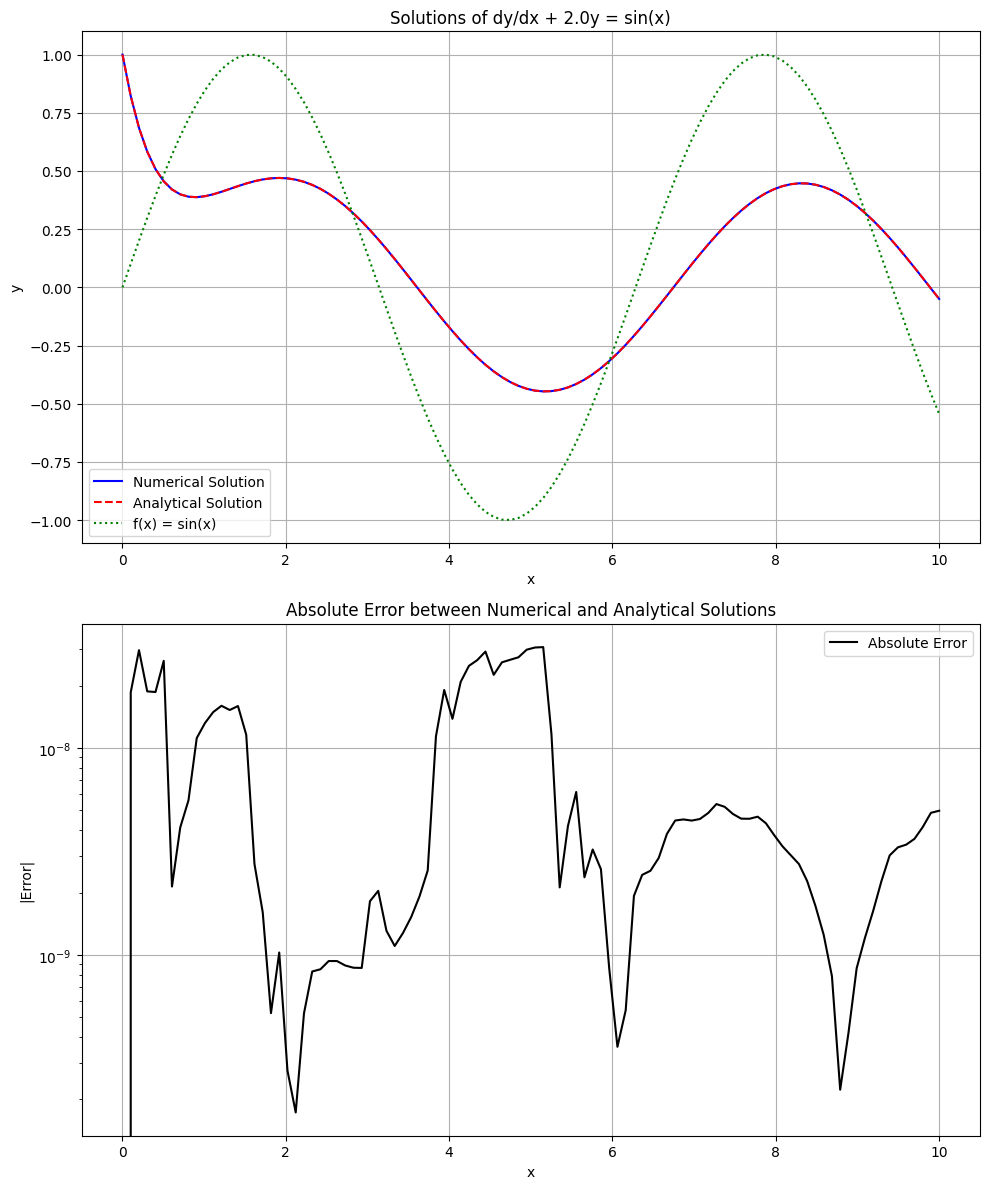


Numerical Results (first 5 rows):


,x,Numerical Solution,Analytical Solution,Absolute Error,f(x)
0,0.00000,1.000000,1.000000,0.0,0.000000
1,0.10101,0.821849,0.821849,0.0,0.100838
2,0.20202,0.685468,0.685467,0.0,0.200649
3,0.30303,0.583073,0.583073,0.0,0.298414
4,0.40404,0.508214,0.508214,0.0,0.393137


In [1]:
"""
Abstract:
This script solves and visualizes the first-order linear ordinary differential equation (ODE):
dy/dx + ay = f(x)

The script implements both numerical and analytical solutions using:
1. SciPy's integrate.odeint for numerical solution
2. The analytical solution using the integrating factor method
3. Visualization of solutions using matplotlib
4. Tabular output of results using pandas

The general solution is y(x) = e^(-ax) * [∫ f(x)e^(ax)dx + C]

Author: Claude
Date: November 2, 2024
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from IPython.display import display

def f(x):
    """
    Define the forcing function f(x)
    For this example, we use f(x) = sin(x)

    Args:
        x (float): Independent variable

    Returns:
        float: Value of f(x) at point x
    """
    return np.sin(x)

def linear_ode(y, x, a):
    """
    Define the ODE dy/dx + ay = f(x)

    Args:
        y (float): Dependent variable
        x (float): Independent variable
        a (float): Coefficient of y

    Returns:
        float: Value of dy/dx at point (x,y)
    """
    return -a * y + f(x)

def analytical_solution(x, a, C):
    """
    Analytical solution using integrating factor method

    Args:
        x (array): Array of x values
        a (float): Coefficient of y
        C (float): Integration constant

    Returns:
        array: Solution y(x)
    """
    # For f(x) = sin(x), the analytical solution is:
    return np.exp(-a*x) * (C + np.exp(a*x) * (a*np.sin(x) - np.cos(x))/(1 + a**2))

def solve_and_plot(a, y0, x_range, num_points=100):
    """
    Solve the ODE numerically and analytically, then create visualizations

    Args:
        a (float): Coefficient of y
        y0 (float): Initial condition y(0)
        x_range (tuple): Range of x values (x_min, x_max)
        num_points (int): Number of points for discretization
    """
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Numerical solution using odeint
    y_numerical = odeint(linear_ode, y0, x, args=(a,))

    # Analytical solution
    # Calculate C using initial condition
    C = y0 - (a*np.sin(0) - np.cos(0))/(1 + a**2)
    y_analytical = analytical_solution(x, a, C)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot solutions
    ax1.plot(x, y_numerical, 'b-', label='Numerical Solution')
    ax1.plot(x, y_analytical, 'r--', label='Analytical Solution')
    ax1.plot(x, f(x), 'g:', label='f(x) = sin(x)')
    ax1.set_title(f'Solutions of dy/dx + {a}y = sin(x)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.grid(True)
    ax1.legend()

    # Plot error between solutions
    error = np.abs(y_numerical.flatten() - y_analytical)
    ax2.semilogy(x, error, 'k-', label='Absolute Error')
    ax2.set_title('Absolute Error between Numerical and Analytical Solutions')
    ax2.set_xlabel('x')
    ax2.set_ylabel('|Error|')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Create and display results table
    results_df = pd.DataFrame({
        'x': x,
        'Numerical Solution': y_numerical.flatten(),
        'Analytical Solution': y_analytical,
        'Absolute Error': error,
        'f(x)': f(x)
    })

    # Display first few rows of the table
    print("\nNumerical Results (first 5 rows):")
    display(results_df.head().round(6))

    return results_df

# Example usage
if __name__ == "__main__":
    # Parameters
    a = 2.0  # Coefficient of y
    y0 = 1.0  # Initial condition
    x_range = (0, 10)  # Range of x values

    # Solve and visualize
    results = solve_and_plot(a, y0, x_range)